In [1]:
import os

# Set the environment variable
os.environ['OPENAI_API_KEY'] ="sk-"

In [2]:
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

In [ ]:
from langchain.document_loaders import WebBaseLoader
from langchain.indexes import VectorstoreIndexCreator

In [133]:
loader = WebBaseLoader("https://www.hkstp.org")

In [219]:
index = VectorstoreIndexCreator().from_loaders([loader])

In [220]:
index.query("What is hkstp")

' HKSTP stands for Hong Kong Science and Technology Parks. It is an organization that works to promote innovation and technology in Hong Kong. It provides infrastructure, funding, corporate partnerships, incubation and acceleration programs, and other resources to help startups and entrepreneurs succeed.'

In [5]:
from langchain.document_loaders.csv_loader import CSVLoader

In [6]:
import pandas as pd

Index(['(Do Not Modify) Program', '(Do Not Modify) Row Checksum',
       '(Do Not Modify) Modified On', 'Account', 'Program Name',
       'Program Status', 'Account Name (CHI) (Account) (Account)',
       'Account Name (ENG) (Account) (Account)',
       'Business Description (Eng) (Account) (Account)',
       'Business Name (CHI) (RFB Tenant) (Account) (Account)',
       'Business Name (ENG) (RFB Tenant) (Account) (Account)',
       'Business Sector (Incubation) (Account) (Account)',
       'Business Sector (Incubation) (Label) (Account) (Account)',
       'Business Sector (Incubation) (Value) (Account) (Account)',
       'Business Type (Account) (Account)', 'Category (Account) (Account)',
       'Category (Capital) (Account) (Account)',
       'Classification (Account) (Account)',
       'Collaboration with Local Institutions / Partners (Account) (Account)',
       'Company Background Summary (Account) (Account)',
       'Company/ Organization Brief Introduction (Eng) (Account) (Accou

In [15]:
df.head(1)

,(Do Not Modify) Program,(Do Not Modify) Row Checksum,(Do Not Modify) Modified On,Account,Program Name,Program Status,Account Name (CHI) (Account) (Account),Account Name (ENG) (Account) (Account),Business Description (Eng) (Account) (Account),Business Name (CHI) (RFB Tenant) (Account) (Account),...,Industry Vertical (Incubation) (Label) (Account) (Account),Product (Eng) for www.hkstp.org (Account) (Account),Product (S Chi) for www.hkstp.org (Account) (Account),Product (T Chi) for www.hkstp.org (Account) (Account),Product Development Status (Incubation) (Account) (Account),"Projects, Products and Services Summary (Account) (Account)","Projects, Products and Services Summary (S Chi) (Account) (Account)","Projects, Products and Services Summary (T Chi) (Account) (Account)",R&D Activities and Plan (Account) (Account),Short description (Eng) for www.hkstp.org (Account) (Account)
0,bb7a1288-f38c-ee11-be36-000d3a07e30c,ssivOUrCPGTyT7YsFX3tL11Kvld4XKhCDDpmXEVDeCLIOb...,2024-01-01 16:00:09,Achelous Pure Metal Company Limited,Acceleration,Current,澤浩高純金屬有限公司,Achelous Pure Metal Company Limited,NaN,NaN,...,Others - Manufacturing||Energy & Environmental,Achelous works to develop elite circular econo...,1）江苏连云港污水处理工程。该系统是在泽浩的设计、监督和测试下构建的。正在讨论二期项目。\n...,1）江蘇連雲港污水處理工程。該系統是在澤浩的設計、監督和測試下構建的。正在討論二期項目。\n...,Early Growth,Achelous' mission is to enhance the environm...,NaN,NaN,Year 2024: \nEstimated Budget: HK$1.36 millio...,NaN


In [16]:
df_hkstp = pd.read_csv("hkstp_company_directory.csv")

In [ ]:
df_hkstp

In [7]:
loader = CSVLoader(file_path='hkstp_company_directory.csv', source_column="name_EN")
data = loader.load()

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 200000, chunk_overlap = 0)
all_splits = text_splitter.split_documents(data)

In [9]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

In [10]:
from langchain.vectorstores import FAISS

In [11]:
db = FAISS.from_documents(all_splits, OpenAIEmbeddings())

In [18]:
db.save_local("index_hkstp_new")

In [ ]:
db = FAISS.from_documents(all_splits[400:475], OpenAIEmbeddings())

In [ ]:
db.save_local("index_solutions")

In [34]:
loader = CSVLoader(file_path='./hkstp_company_directory_web.csv', source_column="Title")
data = loader.load()

In [25]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 20000, chunk_overlap = 0)
all_splits = text_splitter.split_documents(data)

In [18]:
db.save_local("index_hkstp_new")

NameError: name 'db' is not defined

In [120]:
df.columns

Index(['Unnamed: 0', 'ID', 'cluster', 'cluster_TC', 'cluster_SC', 'telephone',
       'fax', 'email', 'website', 'name_EN', 'address_EN', 'contact_EN',
       'introduction_EN', 'product_EN', 'name_TC', 'introduction_TC',
       'product_TC', 'name_SC', 'address_SC', 'contact_SC', 'introduction_SC',
       'product_SC', 'Primary Category', 'Subcategory'],
      dtype='object')

In [121]:
df2

,INVESTOR,英文名称,管理规模(记录币种),管理规模(记录金额),管理规模区间(已换算汇率),品牌介绍,机构官网,资金币种,成立时间,机构人数,主要投资领域,基金管理人数,管理基金数,累计投资企业数,近三个月投资总数
0,深创投,SZVC,CNY,4.314000e+11,￥1000亿~￥1万亿,深创投1999年由深圳市政府出资并引导社会资本出资设立，公司以发现并成就伟大企业为使命，致力...,http://www.szvc.com.cn/main/index/index.shtml,人民币,1999-08-25,349人,企业服务、通用类企业服务、生产制造,60,174支,1811,11
1,红杉中国,HongShan,CNY,5.000000e+10,￥100亿~￥500亿,红杉中国专注于科技/传媒、医疗健康、消费品/服务、工业科技四个方向的投资机遇。十二年来，红杉...,http://www.sequoiacap.cn,人民币,2005-09-01,-,企业服务、通用类企业服务、医疗健康、新一代信息技术、人工智能,3,155支,1784,11
2,YC,YC,NaN,NaN,-,YC成立于2005年4月，是一家位于美国全球领先的孵化机构，扶持初创企业并为其提供创业指南。...,http://www.ycombinator.com,-,2005-03-01,-,金融、企业服务、通用类企业服务、IT服务、新一代信息技术、人工智能、软件和信息技术、软件产业,-,-,1738,31
3,腾讯投资,Tencent Investment,NaN,NaN,-,腾讯投资成立于2008年，是腾讯集团的投资部门与核心战略部门之一，主导集团投资相关业务。长期...,https://da.qq.com/index.shtml,-,2008-01-01,6人,企业服务、通用类企业服务、文体行业、游戏、新一代信息技术,1,3支,1652,17
4,IDG资本,IDG Capital Partners,USD,2.000000e+10,￥1000亿~￥1万亿,IDG资本于1992年开始在中国进行风险投资。IDG资本重点关注互联网、移动互联网、文化娱乐...,http://www.idgvc.com,美元,1992-01-01,110人,电子商务、企业服务、通用类企业服务、新一代信息技术、消费生活,12,144支,1583,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Friále,-,NaN,NaN,-,Friále投资于世界各地正在做大事的初创企业。,-,-,2000-01-01,-,金融、企业服务、通用类企业服务、农业技术、农业相关服务、生物肥料、新一代信息技术、SaaS、...,-,-,8,-
9996,腾晋投资基金,-,NaN,NaN,-,腾晋投资一家由具有全球化视野和资深产业背景的投资管理团队发起，专注宏观背景下智能制造、新一代...,http://www.tjjjvc.com/,-,2016-01-08,-,电子信息产业、光电、电子元件、元器件、芯片、电子设备,1,7支,8,-
9997,Nextgen Ventures,Nextgen Ventures,NaN,NaN,-,Nextgen Ventures是一家股权投资机构。,https://nextgenventures.nl/,-,2013-10-01,-,医疗健康、医疗技术、医疗服务、新一代信息技术、云计算、大数据、软件和信息技术、软件产业、软件工具,-,-,8,-
9998,Decheng Capital,-,NaN,NaN,-,德成资本是一家领先的投资公司，为拥有革命性技术和成长阶段医疗保健公司的早期生命科学公司提供资...,https://www.decheng.com/,-,2000-01-01,-,医药服务、化工、化工制品、生化试剂、医疗健康、医疗器械、医疗技术、医疗服务、诊断试剂、医药,-,-,8,-


In [85]:
df2 = pd.read_csv("VC_PE_20231027_093710.csv")

In [86]:
df2.to_csv("investor.csv")

In [87]:
loader = CSVLoader(file_path='investor.csv', source_column='INVESTOR')
data2 = loader.load()

In [88]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 20000, chunk_overlap = 0)
all_splits2 = text_splitter.split_documents(data2)

In [92]:
db_investor = FAISS.from_documents(all_splits2, OpenAIEmbeddings())

In [94]:
db_investor.save_local("index_funds")

In [95]:
df3 = pd.read_csv("hkstp_company_directory_FINAL_2.csv")

In [99]:
df3.to_csv("hkstp_company_directory_FINAL_3.csv")

In [109]:
loader = CSVLoader(file_path='hkstp_company_directory_FINAL_3.csv', source_column='name_EN')

In [110]:
loader

In [111]:
data3 = loader.load()

In [112]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 20000, chunk_overlap = 0)
all_splits3 = text_splitter.split_documents(data3)

In [113]:
len(all_splits3)

1329

In [114]:
db_company = FAISS.from_documents(all_splits3, OpenAIEmbeddings())

In [115]:
db_company.save_local("index_company")

In [226]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 15000, chunk_overlap = 0)
all_splits = text_splitter.split_documents(data)

In [227]:
all_splits = data

In [13]:
len(all_splits)

476

In [14]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

In [230]:
question = "金融相关的公司"
docs = vectorstore.similarity_search(question)
len(docs)

4

In [233]:
from langchain.vectorstores import FAISS

In [234]:
embedding = OpenAIEmbeddings()

In [235]:
len(all_splits)

1297

In [236]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

In [237]:
db = FAISS.from_documents(all_splits, OpenAIEmbeddings())

Retrying langchain.embeddings.openai.embed_with_retry.<locals>._embed_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-embedding-ada-002 in organization org-gQjObb0VMvJA0HYqcM5kOi8S on tokens per min. Limit: 1000000 / min. Current: 262635 / min. Contact us through our help center at help.openai.com if you continue to have issues..


In [58]:
db.save_local("fais_index_solutions")

In [59]:
new_db = FAISS.load_local("faiss_index_solutions", OpenAIEmbeddings())

In [60]:
query = "锂电池相关的公司"

In [61]:
docs = new_db.similarity_search(query)

In [62]:
docs

[Document(page_content=': 202\nIndex: 7\nInstitute: cityu\nTitle: 水系电池长续航电解质\nLink: https://www.innovationhub.hk/zh-cn/article/solid-state-rechargeable-znnico-and-zn-air-batteries-with-ultra-long-lifetime-and-high-capacity\nweb_content: ****\n\n:::\n\n  * 关于我们\n  * 科研机构\n  * 香港科技\n  * 联络我们\n\n  * A A A\n\n  * 繁 EN 简\n\n  * :::主页\n  * 香港科技\n  * 水系电池长续航电解质\n\n# 水系电池长续航电解质\n\nlogo-coloured-2019\n\n简介\n\n香港城市大学开发了一种聚电解质，使水性锌电池具有超长的使用寿命。开发的电池可用于各种储能系统，提供一种低成本的选择和卓越的安全性能。\n\n  * \n\n完成研究日期\n\n2018\n\n商品化机会\n\n投资\n\n解决方案\n\n水性电解质电池为储能系统提供了终极安全性，但它们的循环稳定性较差。我们的聚电解质提供比最先进的同类产品高一个数量级的循环稳定性，以及半固态 Zn//NiCo\n和 Zn-空气电池的高容量。\n\n创新技术\n\n  * 聚电解质固有的高离子电导率和保水能力\n  * 丙烯酸酯离子促进准固体电解质界面的形成以消除锌枝晶\n\n主要成效\n\n  * 高度安全，无毒无害且无燃烧、爆炸风险。\n  * 具有非凡循环稳定性的水系电池\n  * 低成本器件\n\n应用范畴\n\n  * 高安全储能场景\n\n### 专利申请\n\n  * 美国专利：US 11,177,504 B2\n\n__\n\n网站\n\n__\n\n下载\n\n香港城市大学\n\n香港城市大学（城大）在过去十年是全球发展最迅速的大学之一，被誉为研究及专业教育的创新枢纽。城大在现有研究范畴的内与外，致力扩阔知识领域，为全球的重大挑战寻找解决方案。\n\n城大拥有来自全球各地的世界级研究团队，不但为教学课程带来丰富的专业经验，亦推动了知识和科技的发展。城大的世界级教学设施、国家重

In [54]:
retriever = db.as_retriever(search_kwargs={"k": 20})

In [205]:
docs = retriever.get_relevant_documents("空间构造, 建模")

In [206]:
for i in range(0,20):
    
 print(docs[i])
 print("\n")
 print("\n")

page_content="\ufeffcluster: Electronics\ncluster_TC: 電子\ncluster_SC: 电子\ntelephone: 93702353\nfax: \nemail: shujuan.w@smartspacetech.com.hk\nname_EN: Smart Space Technologies Limited\nwebsite: http://www.smartspacetech.com.hk\nINFO: **Smart Space Technologies Limited**\n\nSmart Space Technologies Limited, backed by the Hong Kong Polytechnic University (PolyU), is a high-tech startup that stands at the forefront of the Electronics sector. Located in the Hong Kong Science Park, this company is dedicated to revolutionizing the smart city landscape.\n\n**Company Vision:**\nSmart Space Technologies Limited aims to enhance the smart city domain by offering advanced products, solutions, and services rooted in cutting-edge geospatial technologies. Their primary focus revolves around 3D Lidar systems, smart city platforms, and urban spatiotemporal big data analysis solutions. Their groundbreaking technologies have garnered significant recognition, including the prestigious Gold Medal at the 20

In [244]:
docs[1].

Document(page_content="\ufeffcluster: Green Technology\ncluster_TC: 綠色科技\ncluster_SC: 绿色科技\ntelephone: +852 60101089\nfax: \nemail: lo.j@duracell.com\nname_EN: Duracell Hong Kong Limited\nwebsite: www.duracell.com\nINFO: Duracell is a renowned battery brand that offers a wide range of products, including AA, AAA, rechargeable, and coin button batteries. The website highlights their Coppertop and Optimum AA and AAA batteries, which are formulated with patented POWER BOOST™ Ingredients. Duracell Lithium Coin batteries are designed for various devices, ensuring reliable and long-lasting power. These batteries come with innovative safety features, including a non-toxic, bitter coating to prevent accidental ingestion. Duracell is also committed to community service, with programs like PowerForward that assist families affected by natural disasters.\nSUMMAR: Based on the information provided, I would categorize Duracell under the following:\n\nPrimary Category: Electronic Technology  \nThe c

In [254]:
docs[1]

Document(page_content="\ufeffcluster: Green Technology\ncluster_TC: 綠色科技\ncluster_SC: 绿色科技\ntelephone: +852 60101089\nfax: \nemail: lo.j@duracell.com\nname_EN: Duracell Hong Kong Limited\nwebsite: www.duracell.com\nINFO: Duracell is a renowned battery brand that offers a wide range of products, including AA, AAA, rechargeable, and coin button batteries. The website highlights their Coppertop and Optimum AA and AAA batteries, which are formulated with patented POWER BOOST™ Ingredients. Duracell Lithium Coin batteries are designed for various devices, ensuring reliable and long-lasting power. These batteries come with innovative safety features, including a non-toxic, bitter coating to prevent accidental ingestion. Duracell is also committed to community service, with programs like PowerForward that assist families affected by natural disasters.\nSUMMAR: Based on the information provided, I would categorize Duracell under the following:\n\nPrimary Category: Electronic Technology  \nThe c

In [ ]:
columns = ['cluster', 'cluster_TC', 'cluster_SC', 'telephone', 'fax', 'email',
       'name_EN', 'website', 'INFO', 'SUMMAR', 'PRIMARY', 'SUB', 'address_EN',
       'contact_EN', 'introduction_EN', 'product_EN', 'name_TC', 'address_TC',
       'contact_TC', 'introduction_TC', 'product_TC', 'name_SC', 'address_SC',
       'contact_SC', 'introduction_SC', 'product_SC']

In [258]:
df.columns

Index(['cluster', 'cluster_TC', 'cluster_SC', 'telephone', 'fax', 'email',
       'name_EN', 'website', 'INFO', 'SUMMAR', 'PRIMARY', 'SUB', 'address_EN',
       'contact_EN', 'introduction_EN', 'product_EN', 'name_TC', 'address_TC',
       'contact_TC', 'introduction_TC', 'product_TC', 'name_SC', 'address_SC',
       'contact_SC', 'introduction_SC', 'product_SC'],
      dtype='object')

In [252]:
docs[1].metadata['row']

332

In [256]:
df.loc[332]

cluster                                             Green Technology
cluster_TC                                                      綠色科技
cluster_SC                                                      绿色科技
telephone                                              +852 60101089
fax                                                              NaN
email                                              lo.j@duracell.com
name_EN                                   Duracell Hong Kong Limited
website                                             www.duracell.com
INFO               Duracell is a renowned battery brand that offe...
SUMMAR             Based on the information provided, I would cat...
PRIMARY                                                          NaN
SUB                                                              NaN
address_EN         Unit 705, 722 and 723, Enterprise Place,\nNo. ...
contact_EN                                               Ms. Jane Lo
introduction_EN                   

In [58]:
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

In [59]:
pip install -q openai langchain playwright beautifulsoup4

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [58]:
from langchain.document_loaders import UnstructuredHTMLLoader

In [22]:
from langchain.document_loaders import AsyncChromiumLoader
from langchain.document_transformers import BeautifulSoupTransformer

In [23]:
from langchain.document_loaders import AsyncHtmlLoader
urls = ["https://www.espn.com", "https://lilianweng.github.io/posts/2023-06-23-agent/"]
loader = AsyncHtmlLoader(urls)

In [69]:
subcategories = {
    "Biotechnology": ["Biopharmaceuticals", "Bioinformatics", "Medical Devices", "Clinical Research", "Pharmaceutical Technology"],
    "Electronic Technology": ["Electronic Design Automation", "Integrated Circuit Design", "Consumer Electronics", "Advanced Manufacturing", "Automotive Electronics"],
    "ICT (Information and Communication Technology)": ["Software Development", "Big Data & Data Analysis", "Artificial Intelligence & Machine Learning", "Blockchain Technology", "Cloud Computing", "Web3 Technology", "Mobile Internet"],
    "Green Technology": ["Environmental Protection Technology", "Energy Efficiency Solutions", "Renewable Energy Technology", "Water Resource Management Technology", "Waste Treatment Technology"],
    "Materials & Precision Engineering": ["Advanced Material Research", "Nanotechnology", "Optoelectronics", "Mechanical Automation", "3D Printing Technology"],
    "Digital Entertainment & Design": ["Game Development", "Animation & Film Production", "Virtual Reality & Augmented Reality", "Product & Industrial Design", "Metaverse Virtual Socialization", "Metaverse Economy & Currency"],
    "Fintech": ["Payment Solutions", "Blockchain in Financial Services", "Risk Management Tools", "Assets & Investment Management Technology", "Cryptocurrency & DeFi Solutions", "Insurtech"],
    "Health Technology": ["Medical Health Applications", "Medical Devices & Technology", "Health Management Platform", "Elderly Health Care"],
    "PropTech (Property Technology)": ["Real Estate Market Analysis Tools", "Virtual Reality Real Estate Showcasing", "Property Management & Automation", "Real Estate Investment Platform", "Leasing & Sharing Economy Solutions"],
    "Intelligent Robot Technology": ["Service Robots", "Industrial Robots", "Medical Robots", "Detection & Search and Rescue Robots", "Companion & Educational Robots", "Drone Technology"],
    "Transportation Technology": ["Intelligent Transportation", "Autonomous Driving", "New Energy Vehicles"],
    "EdTech (Educational Technology)": ["Online Education", "Smart Learning"]
}

In [105]:
subcategories_str = str(subcategories).replace("'"," ").replace("{ "," ").replace("}"," ")

In [120]:
question = "According to categories system:"+subcategories_str +\
"tell the Primary Category and Subcategory of this company, \
one company can only have one Primary Category and Subcategory, so find the most related one"+data[100].page_content

In [121]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

In [122]:
response_schemas = [
    ResponseSchema(name="answer", description="answer to the user's question"),
    ResponseSchema(name="Primary Category",description="tell the primary category according to the answer"),
    ResponseSchema(name="Subcategory",description="tell the Subcategory according to the answer"),
    ResponseSchema(name="Reason", description="reason why you get this answer")
]
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [123]:
format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="answer the users question as best as possible.\n{format_instructions}\n{question}",
    input_variables=["question"],
    partial_variables={"format_instructions": format_instructions}
)

In [124]:
model = OpenAI(temperature=0)

In [125]:
_input = prompt.format_prompt(question=question)
output = model(_input.to_string())

In [126]:
output

'\n\n```json\n{\n\t"answer": "Microbiota I-Center (MagIC) Limited is a company that focuses on advancing science in the gut microbiome and promoting entrepreneurship.",\n\t"Primary Category": "Biotechnology, Health Technology",\n\t"Subcategory": "Bioinformatics, Medical Health Applications",\n\t"Reason": "The company focuses on advancing science in the gut microbiome and promoting entrepreneurship, which falls under the categories of Biotechnology and Health Technology, and the subcategories of Bioinformatics and Medical Health Applications."\n}\n```'

In [127]:
question

'According to categories system Biotechnology : [ Biopharmaceuticals ,  Bioinformatics ,  Medical Devices ,  Clinical Research ,  Pharmaceutical Technology ],  Electronic Technology : [ Electronic Design Automation ,  Integrated Circuit Design ,  Consumer Electronics ,  Advanced Manufacturing ,  Automotive Electronics ],  ICT (Information and Communication Technology) : [ Software Development ,  Big Data & Data Analysis ,  Artificial Intelligence & Machine Learning ,  Blockchain Technology ,  Cloud Computing ,  Web3 Technology ,  Mobile Internet ],  Green Technology : [ Environmental Protection Technology ,  Energy Efficiency Solutions ,  Renewable Energy Technology ,  Water Resource Management Technology ,  Waste Treatment Technology ],  Materials & Precision Engineering : [ Advanced Material Research ,  Nanotechnology ,  Optoelectronics ,  Mechanical Automation ,  3D Printing Technology ],  Digital Entertainment & Design : [ Game Development ,  Animation & Film Production ,  Virtual 

In [139]:
chat_model = ChatOpenAI(temperature=0,model_name='gpt-4')

In [129]:
prompt = ChatPromptTemplate(
    messages=[
        HumanMessagePromptTemplate.from_template("answer the users question as best as possible.\n{format_instructions}\n{question}")  
    ],
    input_variables=["question"],
    partial_variables={"format_instructions": format_instructions}
)

In [130]:
_input = prompt.format_prompt(question=question)
output = chat_model(_input.to_messages())

In [149]:
output_parser.parse(output.content)

{'answer': 'Aifin Technology Co., Limited',
 'Primary Category': 'ICT (Information and Communication Technology)',
 'Subcategory': 'Artificial Intelligence & Machine Learning, Software Development, Big Data & Data Analysis',
 'Reason': 'Aifin Technology Co., Limited specializes in artificial intelligence and machine learning solutions for the banking and financial sectors. They have developed various AI applications and systems for banking services and use big data analytics to analyze customer behaviors and make targeted product recommendations.'}

In [176]:
data[i]

Document(page_content="\ufeffcluster: Information Communications Technology\ncluster_TC: 資訊及通訊科技\ncluster_SC: 资讯及通讯科技\ntelephone: \nfax: \nemail: \nname_EN: Carbon Exchange (Hong Kong) Limited\nwebsite: http://www.carbonexchange.net\nINFO: \nSUMMAR: \nPRIMARY: \nSUB: \naddress_EN: \ncontact_EN: \nintroduction_EN: Carbon Exchange is a carbon management company. We aim at developing a green future through innovation for green finance and pathfinding for green investment.\nWe meet our customers' demand to:\n1. Increase transparency of ESG reporting\n2. Enhance investment quality for carbon reduction projects\nWe promote measurable, verifiable and reportable approaches with our expertise and innovation, such as SaaS and AI, to improve the transparency of financial and green returns and project investability. We have been involved in more than 1,000 projects to prove our approach workable, and we are serving more for a greener future.\nproduct_EN: One of our flagship products, SMART 610, is

In [190]:
for i in range(1023,1300):
    question = "According to categories system"+subcategories_str +\
    "tell the Primary Category and Subcategory of this company, \
    it can have multyple Primary Category and Subcategory "+data[i].page_content
    
    prompt = ChatPromptTemplate(
    messages=[
        HumanMessagePromptTemplate.from_template("answer the users question as best as possible.\n{format_instructions}\n{question}")  
    ],
    input_variables=["question"],
    partial_variables={"format_instructions": format_instructions}
    )
    
    _input = prompt.format_prompt(question=question)
    output = chat_model(_input.to_messages())
    
    df.loc[i,"Primary Category"] = output_parser.parse(output.content)['Primary Category']
    df.loc[i,"Subcategory"] = output_parser.parse(output.content)['Subcategory']
    df.loc[i,"remarks"]  = output_parser.parse(output.content)['Reason']
    df.loc[i,"raw"] = str(output_parser.parse(output.content))
    print(i)
    print(output_parser.parse(output.content))
    print("\n")

1023
{'answer': 'Next Drive Limited', 'Primary Category': 'ICT (Information and Communication Technology), Transportation Technology, EdTech (Educational Technology)', 'Subcategory': 'Cloud Computing, Artificial Intelligence & Machine Learning, Virtual Reality & Augmented Reality, Intelligent Transportation, Online Education', 'Reason': 'Next Drive Limited is engaged in motoring training using advanced technology. They have an innovative platform for learning driving skills that uses cloud computing to match users and employs artificial intelligence and virtual reality for motor driving training. This places them in the ICT category under Cloud Computing, AI & Machine Learning, and VR & AR. They also fall under the Transportation Technology category due to their focus on driving training, specifically under Intelligent Transportation. Lastly, their educational aspect places them in the EdTech category under Online Education.'}


1024
{'answer': 'Based on the information provided, LEVEL

1034
{'answer': 'Based on the provided information, Jedies Advance can be categorized as follows:\n\nPrimary Category: ICT (Information and Communication Technology)\nSubcategory: Artificial Intelligence & Machine Learning, Big Data & Data Analysis', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Artificial Intelligence & Machine Learning, Big Data & Data Analysis', 'Reason': 'Jedies Advance is an AI solutions company that develops AI-powered solutions using natural language processing, data analytics, and AI engines. They offer AI customer service chatbots, sales promotion bots, market trend bots, data analytics services, and AI consulting. These products and services align with the subcategories of Artificial Intelligence & Machine Learning and Big Data & Data Analysis under the ICT (Information and Communication Technology) primary category.'}


1035
{'answer': 'iRobot (HK) Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': '

1050
{'answer': 'Blue Innowater Company Limited', 'Primary Category': 'Green Technology', 'Subcategory': 'Waste Treatment Technology', 'Reason': 'The company is a waste water treatment company with its main product being the SANI® process, a novel wastewater treatment technology. This places it in the Green Technology primary category and the Waste Treatment Technology subcategory.'}


1051
{'answer': 'SkyHorse Innovation Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Software Development', 'Reason': 'The company SkyHorse Innovation Limited is primarily involved in the digitisation of basic services through innovative tech solutions. This falls under the Information and Communication Technology category, specifically in the Software Development subcategory as they develop software for shared charging stations, self-service laundry payment systems, smart laundry cabinets system, and smart lockers.'}


1052
{'answer': 'Tyrehood is primaril

1065
{'answer': 'Based on the provided information about Manson Webtech and their Doctor Q app, the company can be categorized as follows:\n\n1. **Primary Category: ICT (Information and Communication Technology)**\n   - **Subcategory: Mobile Internet**\n     **Explanation**: Manson Webtech has developed a healthcare mobile application, Doctor Q, for iOS and Android platforms, placing it firmly within the domain of mobile internet technologies.\n\n   - **Subcategory: Software Development**\n     **Explanation**: They\'ve designed and developed an application, which involves the process of software development.\n\n   - **Subcategory: Big Data & Data Analysis**\n     **Explanation**: The company maintains a doctor database and content management system, suggesting they handle and analyze a significant amount of data.\n\n2. **Primary Category: Health Technology**\n   - **Subcategory: Medical Health Applications**\n     **Explanation**: The core product, Doctor Q, is an app designed to faci

1074
{'answer': 'Lexuma Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Consumer Electronics', 'Reason': "Based on the company's description, they design and develop a range of unique and stylish electronics products, which falls under the Consumer Electronics subcategory of the Electronic Technology primary category."}


1075
{'answer': 'Coraleus Limited', 'Primary Category': 'ICT (Information and Communication Technology), Fintech', 'Subcategory': 'Artificial Intelligence & Machine Learning, Risk Management Tools', 'Reason': 'Coraleus Limited is a company that specializes in Anti-Money Laundering (AML) solutions and regulations. They are developing a new solution with Artificial Intelligence and Machine Learning to provide a comprehensive health check across multiple industries that AML plays an important role in their operations. This falls under the ICT category, specifically the Artificial Intelligence & Machine Learning subcategory. Additionally, since thei

1084
{'answer': 'MIoT Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Consumer Electronics', 'Reason': 'MIoT Limited is a company that focuses on low power consumption IoT solutions and energy-saving smart products. They have developed a new generation AC-to-DC power supply specifically designed for IoT applications. This places them in the Electronic Technology primary category, specifically under the Consumer Electronics subcategory.'}


1085
{'answer': 'eFunLearning Limited', 'Primary Category': 'EdTech (Educational Technology)', 'Subcategory': 'Smart Learning', 'Reason': 'The company eFunLearning Limited is primarily involved in the development of an educational application that uses gamification to motivate learners. This falls under the category of Educational Technology, specifically Smart Learning.'}


1086
{'answer': 'Mixon Technologies Limited (formerly known as Kami Intelligence Limited)', 'Primary Category': 'ICT (Information and Communication Technol

1098
{'answer': 'Karta-X Technologies Limited', 'Primary Category': 'Electronic Technology, ICT (Information and Communication Technology)', 'Subcategory': 'Consumer Electronics, Big Data & Data Analysis', 'Reason': 'Karta-X Technologies is a company that focuses on IoT and video-based analytics, which falls under the Consumer Electronics subcategory of Electronic Technology and the Big Data & Data Analysis subcategory of ICT (Information and Communication Technology). They provide solutions for the retail, construction, and lighting industries.'}


1099
{'answer': "Based on the provided description of GoByBus.hk operated by Goba Solutions Limited, the company can be categorized under the following classifications:\n\n1. Transportation Technology\n   - Subcategory: Intelligent Transportation\n   - Explanation: GoByBus.hk is a platform that provides direct bus services between China and Hong Kong, promoting hassle-free travel with its user-friendly booking system. It falls under the dom

1109
{'answer': 'WanaStay Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Artificial Intelligence & Machine Learning', 'Reason': 'The company WanaStay Limited operates in the Information and Communication Technology sector. Specifically, it uses Artificial Intelligence & Machine Learning in its peer to peer dynamic hotel booking system.'}


1110
{'answer': 'OnAwake Software Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Software Development, Game Development', 'Reason': 'The company OnAwake Software Limited is specialized in software development and game production, specifically in mobile app development. This places it in the Information and Communication Technology category, with a focus on Software Development. Additionally, as they are also involved in game production, they fall under the Game Development subcategory of Digital Entertainment & Design.'}


1111
{'answer': 'Dayta AI Limit

1123
{'answer': 'Sisters Pro AI Solutions Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Artificial Intelligence & Machine Learning', 'Reason': "The company name 'Sisters Pro AI Solutions Limited' suggests that it operates in the field of Artificial Intelligence, which falls under the Information and Communication Technology category."}


1124
{'answer': 'TriTerra Technology Limited', 'Primary Category': 'Green Technology', 'Subcategory': 'Energy Efficiency Solutions', 'Reason': 'TriTerra Technology Limited is a company that provides innovative mobile power supply devices and systems. They offer a full package of power electronic solutions including inverters, battery management system (BMS), IoT module, mobile App, SaaS Server, charging circuit, DC power supply, bypass circuit, maximum power tracking system (MPPT), thermal dissipation mechanism, EV battery grading system. They also revalue wasted resources and materials into practical p

1137
{'answer': 'Kin Technology Limited', 'Primary Category': 'Health Technology', 'Subcategory': 'Medical Health Applications', 'Reason': 'Kin Technology Limited is a company that focuses on improving drug-safety and management efficiency. They offer both B2B2C and B2C solutions in drug management, which falls under the category of Health Technology, specifically the subcategory of Medical Health Applications.'}


1138
{'answer': 'Cloud Light Technology Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Optoelectronics', 'Reason': 'The company focuses on design, development, production and supply of cutting-edge fibre optic transceiver modules, active optical cables, optical finger navigation modules and custom optoelectronics solutions for data communications and automotive applications.'}


1139
{'answer': 'Steifpower Technology Company Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Advanced Manufacturing', 'Reason': 'Steifpower Technology

1154
{'answer': 'RaSpect Intelligence Inspection Limited', 'Primary Category': 'ICT (Information and Communication Technology), PropTech (Property Technology)', 'Subcategory': 'Artificial Intelligence & Machine Learning, Property Management & Automation', 'Reason': 'The company RaSpect Intelligence Inspection Limited is an AI deep tech company for smart city. They offer AI SaaS solution as well as AI inspection and monitoring services for property owners, property management companies and government. This indicates that they fall under the primary categories of ICT and PropTech, and the subcategories of Artificial Intelligence & Machine Learning and Property Management & Automation.'}


1155
{'answer': 'Farseer Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Big Data & Data Analysis, Artificial Intelligence & Machine Learning', 'Reason': 'The company uses proprietary AI and big data to sift through global trusted news sources and social m

1169
{'answer': 'Deltron Intelligence Technology Holdings Limited', 'Primary Category': 'Materials & Precision Engineering', 'Subcategory': 'Advanced Material Research', 'Reason': 'The company Deltron is using multi spectrum sensor to categorize fruits according to their sweetness and ripeness level. This falls under the category of Materials & Precision Engineering and the subcategory of Advanced Material Research.'}


1170
{'answer': 'ROHTO Advanced Research Hong Kong Limited', 'Primary Category': 'Biotechnology', 'Subcategory': 'Biopharmaceuticals', 'Reason': 'The company is involved in the production of cosmetics, pharmaceutical products and functional foods, which falls under the Biotechnology primary category and Biopharmaceuticals subcategory.'}


1171
{'answer': 'Superior Autonomation Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Advanced Manufacturing', 'Reason': "The company name 'Superior Autonomation Limited' suggests that it is involved in automati

1187
{'answer': 'CU Coding Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Software Development, Big Data & Data Analysis, Cloud Computing', 'Reason': 'CU Coding Limited is an Independent Software Vendor (ISV) for applications by Network Coding technology. They have developed a product called nCloud, a network-coding-based cloud storage system that provides fault tolerance and reduces data repair cost when storing files using multi-cloud storage. This falls under the categories of Software Development, Big Data & Data Analysis, and Cloud Computing within the primary category of ICT (Information and Communication Technology).'}


1188
{'answer': 'PDL Technology Limited', 'Primary Category': 'Electronic Technology', 'Subcategory': 'Integrated Circuit Design', 'Reason': 'The company is composed of IC chip design professionals and offers IC products in motor applications ranging from E-bike to household appliances, from Drone to AI robotics. 

1203
{'answer': 'Casa Technologies Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Software Development', 'Reason': 'The company Casa Technologies Limited is primarily involved in the development of software solutions for 5G transformation, which falls under the category of Information and Communication Technology, specifically Software Development.'}


1204
{'answer': "King's Phase Technologies Limited", 'Primary Category': 'Electronic Technology', 'Subcategory': 'Consumer Electronics', 'Reason': "King's Phase Technologies is a company that specializes in the development of semiconductor ketone gas sensors. This falls under the category of Electronic Technology, specifically Consumer Electronics, as their product is intended for use by individuals for personal health monitoring."}


1205
{'answer': 'EquityX Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Artificial Intelligence & Machine Le

1220
{'answer': 'Intepay Company Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Payment Solutions', 'Reason': 'The company, Intepay Company Limited, is primarily involved in the Information and Communication Technology sector. More specifically, they are engaged in Payment Solutions as they have developed a platform that provides comprehensive comparisons for different e-payment methods.'}


1221
{'answer': 'Pons Company Limited', 'Primary Category': 'ICT (Information and Communication Technology), Digital Entertainment & Design, Fintech', 'Subcategory': 'Artificial Intelligence & Machine Learning, Metaverse Virtual Socialization, Metaverse Economy & Currency, Cryptocurrency & DeFi Solutions', 'Reason': 'PONS.ai is an AI-powered social marketplace for physical and NFT art and entertainment products. It uses AI and NFT technologies to empower creatives and companies. It also operates on the blockchain, specifically the Flow network, which

1236
{'answer': 'PATech Limited', 'Primary Category': 'Biotechnology', 'Subcategory': 'Medical Devices', 'Reason': 'The company PATech Limited is primarily involved in the development of biomedical imaging systems, which falls under the category of Biotechnology. More specifically, their work is related to Medical Devices, as they develop systems like photoacoustic microscopy, photoacoustic computed tomography, and high energy focused ultrasonic therapy.'}


1237
{'answer': 'Deepsite Limited', 'Primary Category': 'ICT (Information and Communication Technology)', 'Subcategory': 'Artificial Intelligence & Machine Learning', 'Reason': 'The company Deepsite Limited is primarily involved in the development of enterprise AI, delivering Computer Vision, trusted AI technology and customizable service to global enterprises. They provide deep learning solutions in video intelligent analyzing and documents processing automation(RPA). This aligns with the ICT (Information and Communication Technol

1253
{'answer': 'Hoho Living Technology Limited', 'Primary Category': 'Electronic Technology, ICT (Information and Communication Technology), Health Technology', 'Subcategory': 'Consumer Electronics, Big Data & Data Analysis, Artificial Intelligence & Machine Learning, Medical Health Applications', 'Reason': "The company develops software to detect, collect and use big data in real time with IoT, and uses AI technology to ensure personal safety and enhance the quality of life. Their main product is the 'HoHoCare' system, which is a health application designed to protect the health and safety of users, especially the elderly."}


1254
{'answer': 'EchoX Technology Limited', 'Primary Category': 'Health Technology, ICT (Information and Communication Technology)', 'Subcategory': 'Medical Devices & Technology, Artificial Intelligence & Machine Learning', 'Reason': 'The company EchoX Technology Limited focuses on developing intelligent medical tools in ultrasound imaging, which falls under th

1269
{'answer': 'Based on the information provided, Eneuron (HK) Limited can be classified under multiple primary categories and subcategories. The primary categories include Information and Communication Technology (ICT), Green Technology, and Electronic Technology. The subcategories include Cloud Computing under ICT, Energy Efficiency Solutions under Green Technology, and Advanced Manufacturing under Electronic Technology.', 'Primary Category': 'Information and Communication Technology (ICT), Green Technology, Electronic Technology', 'Subcategory': 'Cloud Computing, Energy Efficiency Solutions, Advanced Manufacturing', 'Reason': 'Eneuron (HK) Limited provides IoT solutions and cloud-based platforms for smart facility management, which falls under ICT and specifically Cloud Computing. Their solutions aim to improve energy efficiency and reduce operating costs, which is a part of Green Technology and specifically Energy Efficiency Solutions. The company also develops various electronic

1284
{'answer': 'ZeeqClean Technology Limited', 'Primary Category': 'Materials & Precision Engineering', 'Subcategory': 'Mechanical Automation', 'Reason': 'ZeeqClean Technology Limited is a robotic technology company that provides washroom cleaning services via automation and AI technology. Their product, the automatic commercial washroom cleaning robot ZC-01™, provides intelligent and automatic cleaning solutions for large-volume public washrooms. This falls under the category of Materials & Precision Engineering and the subcategory of Mechanical Automation.'}


1285
{'answer': "The primary category of CharCOOL Limited is 'Materials & Precision Engineering'. However, the subcategory is not explicitly mentioned in the provided information.", 'Primary Category': 'Materials & Precision Engineering', 'Subcategory': 'Not specified', 'Reason': "The company is focused on producing climate-friendly construction materials by converting waste biomass into high-value, carbon-negative biochar pla

IndexError: list index out of range

In [157]:
df.loc[599]

cluster                       Venues
cluster_TC                       NaN
cluster_SC                       NaN
telephone                        NaN
fax                              NaN
email                            NaN
name_EN             Cheung Wai Leung
website                          NaN
INFO                             NaN
SUMMAR                           NaN
PRIMARY                          NaN
SUB                              NaN
address_EN                       NaN
contact_EN                       NaN
introduction_EN                  NaN
product_EN                       NaN
name_TC             Cheung Wai Leung
address_TC                       NaN
contact_TC                       NaN
introduction_TC                  NaN
product_TC                       NaN
name_SC             Cheung Wai Leung
address_SC                       NaN
contact_SC                       NaN
introduction_SC                  NaN
product_SC                       NaN
Primary Category                 NaN
S

In [146]:
output_parser.parse(output.content)

{'answer': 'Aifin Technology Co., Limited',
 'Primary Category': 'ICT (Information and Communication Technology)',
 'Subcategory': 'Artificial Intelligence & Machine Learning, Software Development, Big Data & Data Analysis',
 'Reason': 'Aifin Technology Co., Limited specializes in providing artificial intelligence and machine learning solutions tailored for the banking and financial sectors. They have developed various AI applications and systems for banking services. They also integrate AI and machine learning models with big data analytics to analyze customer behaviors and make targeted product recommendations.'}

In [192]:
df.to_csv("1234.csv")

In [193]:
df

,cluster,cluster_TC,cluster_SC,telephone,fax,email,name_EN,website,INFO,SUMMAR,...,product_TC,name_SC,address_SC,contact_SC,introduction_SC,product_SC,Primary Category,Subcategory,remarks,raw
0,Electronics,電子,电子,NaN,NaN,NaN,XTX Technology Limited,http://www.xtxtech.com,Here is a summary of the key information about...,"Based on the provided information, XTX Technol...",...,,XTX Technology Limited,NaN,NaN,,,"Electronic Technology, ICT (Information and Co...","Integrated Circuit Design, Big Data & Data Ana...",XTX Technology specializes in the design of ge...,NaN
1,Electronics,電子,电子,+852 97998076,NaN,info@treelyair.com,Treely Air Technology Limited,treelyair.com,Treely Air Technology Limited specializes in t...,"Certainly, based on the information provided:\...",...,森為科技專注研發可持續及綠色的空氣清新方案。我們的產品採用壽命長的紫外光空氣清新燈而非HEP...,森為科技有限公司,"Unit 621 , 6/F, Building 19W,\nNo. 19 Science ...",Mr. Oswis Wong,森为科技于2021年成立，2022年初推出第一项产品，即获得超过300宗订单，客户群广泛，包...,森为科技专注研发可持续及绿色的空气清新方案。我们的产品採用长寿命的紫外光空气清新灯而非HEP...,Green Technology,"Environmental Protection Technology, Energy Ef...",The company's focus on developing green and su...,NaN
2,Material and Precision Engineering,新物料及精密工程,新物料及精密工程,+852 2409 3963,NaN,nicholaslai@protechnic.com.hk,Data Digitalisation Limited,https://www.datadigitalisation.com/,Given the categories and subcategories provide...,Based on the information provided about Data D...,...,Data Digitalisation Limited 的PTApp會直接從客戶工廠生產設備...,Data Digitalisation Limited,"Lion Rock 72, 1/F, InnoCentre\n72 Tat Chee Ave...",Mr. Nicholas Yui Man Lai,Data Digitalisation Limited研发的PTApp，通过工业物联网系统协...,Data Digitalisation Limited 的PTApp会直接从客户工厂生产设备...,Materials & Precision Engineering,"Mechanical Automation, Big Data & Data Analysi...",Data Digitalisation Limited focuses on digital...,NaN
3,Information Communications Technology,資訊及通訊科技,资讯及通讯科技,+852 97774967,NaN,yan.or@firefilm.io,Firefilm Group Limited,www.firefilm.io,"Firefilm Group Limited, founded in 2022, is a ...","Given the information provided for ""Firefilm G...",...,我們致力提升日常內容製作的創作和審批效率，借助人工智能和大數據分析以加速和提升內容創作從業員...,Firefilm Group Limited,"Unit 941, 9/F, Building 19W,\nNo. 19 Science P...",Ms. Yan Or,firefilm.io 成立于 2022 年，是一个用于视频内容创作、协作和提升生产力的软件...,我们致力提升日常内容制作的创作和审批效率，借助人工智能和大数据分析以加速和提升内容创作从业员...,ICT (Information and Communication Technology),"Software Development, Big Data & Data Analysis...",Firefilm Group Limited is a software-as-a-serv...,NaN
4,Material and Precision Engineering,新物料及精密工程,新物料及精密工程,+852 59317389,NaN,info@libpet.com,Libpet Tech Limited,https://www.libpet.com/,"Libpet Tech Limited, also known as 途齡科技有限公司 in...","Based on the detailed categories provided, I w...",...,Libpet 開發的人工智能載具搭配人工智慧和創新科技，為用戶帶來前所未有的動力。載具的防撞...,途齡科技有限公司,"Unit 659, 6/F, Building 19W,\nNo. 19 Science P...",Mr. Huafeng Xu,Libpet是一家在2022年6月成立的创新科技公司，专注于开发具备移动能力的创新产品及提供...,Libpet 开发的人工智能载具搭配人工智慧和创新科技，为用户带来前所未有的动力。载具的防撞...,"Materials & Precision Engineering, ICT (Inform...","Mechanical Automation, Optoelectronics, Advanc...",Libpet Tech Limited focuses on developing inno...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,Information Communications Technology,資訊及通訊科技,资讯及通讯科技,61032979,NaN,jack@perksbar.com,Perksbar Limited,https://www.perksbar.com/,NaN,NaN,...,借助PerksBar應用程式，公司管理層可以表揚和獎勵員工的表現，創建一個積極的工作環境， ...,Perksbar Limited,"Unit 1058, 10/F, Building 19W,\nNo. 19 Science...",Mr. Jack Cheung,PerksBar 是一个全面的员工参与平台，提供数字奖励、工作表扬，以及以 ESG、健康和福...,借助PerksBar应用程序，公司管理层可以表扬和奖励员工的表现，创建一个积极的工作环境， ...,ICT (Information and Communication Technology),Software Development,PerksBar is an all-round employee engagement p...,"{'answer': 'Perksbar Limited', 'Primary Catego..."
1293,Electronics,電子,电子,54415292,NaN,suicy1992@gmail.com,DepthVision Limited,NaN,NaN,NaN,...,雲芯慧視研發並銷售高端三維傳感器，用来可靠準確地獲取真實物體和場景的三維信息。公司的三維傳感...,雲芯慧視科技有限公司,"Unit 701, 7/F, Building 19W,\nNo. 19 Science P...",Dr. Congying Sui,云芯慧视科技有限公司是专业从事高端三维传感器和视觉解决方案的高新技术企业。公司成立于2021...,云芯慧视研发并销售高端三维传感器，用来可靠准确地获取真实物体和场景的三维信息。公司的三维

In [194]:
# Define the category system as a dictionary where each primary category maps to a list of its subcategories
category_system = {
    "Biotechnology": ["Biopharmaceuticals", "Bioinformatics", "Medical Devices", "Clinical Research", "Pharmaceutical Technology"],
    "Electronic Technology": ["Electronic Design Automation", "Integrated Circuit Design", "Consumer Electronics", "Advanced Manufacturing", "Automotive Electronics"],
    "ICT (Information and Communication Technology)": ["Software Development", "Big Data & Data Analysis", "Artificial Intelligence & Machine Learning", "Blockchain Technology", "Cloud Computing", "Web3 Technology", "Mobile Internet"],
    "Green Technology": ["Environmental Protection Technology", "Energy Efficiency Solutions", "Renewable Energy Technology", "Water Resource Management Technology", "Waste Treatment Technology"],
    "Materials & Precision Engineering": ["Advanced Material Research", "Nanotechnology", "Optoelectronics", "Mechanical Automation", "3D Printing Technology"],
    "Digital Entertainment & Design": ["Game Development", "Animation & Film Production", "Virtual Reality & Augmented Reality", "Product & Industrial Design", "Metaverse Virtual Socialization", "Metaverse Economy & Currency"],
    "Fintech": ["Payment Solutions", "Blockchain in Financial Services", "Risk Management Tools", "Assets & Investment Management Technology", "Cryptocurrency & DeFi Solutions", "Insurtech"],
    "Health Technology": ["Medical Health Applications", "Medical Devices & Technology", "Health Management Platform", "Elderly Health Care"],
    "PropTech (Property Technology)": ["Real Estate Market Analysis Tools", "Virtual Reality Real Estate Showcasing", "Property Management & Automation", "Real Estate Investment Platform", "Leasing & Sharing Economy Solutions"],
    "Intelligent Robot Technology": ["Service Robots", "Industrial Robots", "Medical Robots", "Detection & Search and Rescue Robots", "Companion & Educational Robots", "Drone Technology"],
    "Transportation Technology": ["Intelligent Transportation", "Autonomous Driving", "New Energy Vehicles"],
    "EdTech (Educational Technology)": ["Online Education", "Smart Learning"]
}

# Initialize a dictionary to store the counts for each category and subcategory
category_counts = {primary: {sub: 0 for sub in subs} for primary, subs in category_system.items()}

# Loop through each row in the DataFrame to count the occurrences of each category and subcategory
for idx, row in df.iterrows():
    primary_categories = str(row['Primary Category']).split(',')
    subcategories = str(row['Subcategory']).split(',')
    
    for primary in primary_categories:
        primary = primary.strip()  # Remove any leading or trailing whitespaces
        if primary in category_system:  # Check if the primary category exists in the predefined system
            for sub in subcategories:
                sub = sub.strip()  # Remove any leading or trailing whitespaces
                if sub in category_system[primary]:  # Check if the subcategory exists under the primary category
                    category_counts[primary][sub] += 1  # Increment the count

category_counts


{'Biotechnology': {'Biopharmaceuticals': 141,
  'Bioinformatics': 44,
  'Medical Devices': 53,
  'Clinical Research': 17,
  'Pharmaceutical Technology': 11},
 'Electronic Technology': {'Electronic Design Automation': 14,
  'Integrated Circuit Design': 53,
  'Consumer Electronics': 126,
  'Advanced Manufacturing': 49,
  'Automotive Electronics': 3},
 'ICT (Information and Communication Technology)': {'Software Development': 231,
  'Big Data & Data Analysis': 135,
  'Artificial Intelligence & Machine Learning': 221,
  'Blockchain Technology': 38,
  'Cloud Computing': 48,
  'Web3 Technology': 14,
  'Mobile Internet': 45},
 'Green Technology': {'Environmental Protection Technology': 67,
  'Energy Efficiency Solutions': 36,
  'Renewable Energy Technology': 23,
  'Water Resource Management Technology': 3,
  'Waste Treatment Technology': 14},
 'Materials & Precision Engineering': {'Advanced Material Research': 117,
  'Nanotechnology': 13,
  'Optoelectronics': 8,
  'Mechanical Automation': 24,

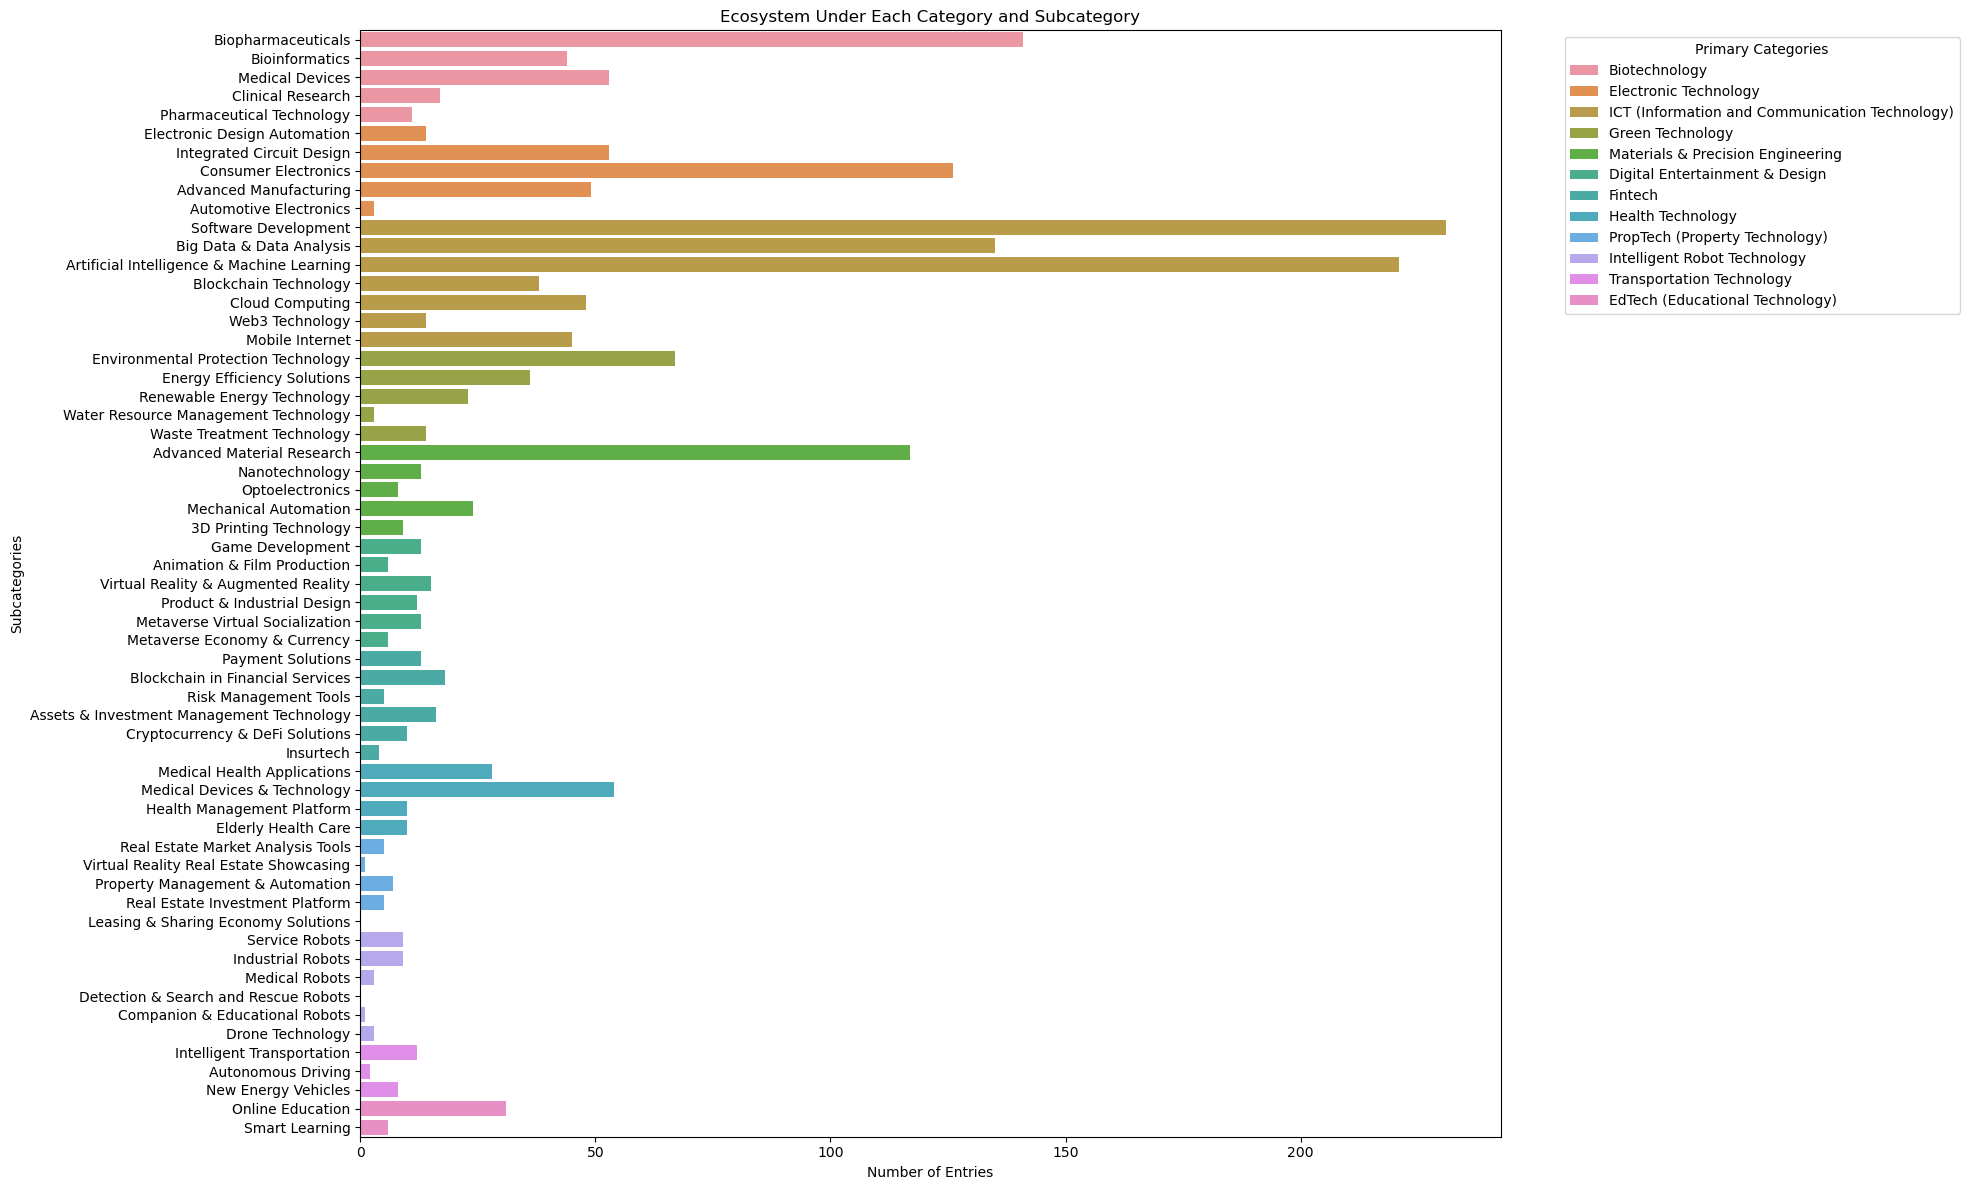

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the category_counts dictionary for easier plotting
category_df_list = []
for primary, subs in category_counts.items():
    for sub, count in subs.items():
        category_df_list.append({'Primary Category': primary, 'Subcategory': sub, 'Count': count})
        
category_df = pd.DataFrame(category_df_list)

# Create the plot
plt.figure(figsize=(20, 12))
sns.barplot(x='Count', y='Subcategory', hue='Primary Category', data=category_df, dodge=False)
plt.title('Ecosystem Under Each Category and Subcategory')
plt.xlabel('Number of Entries')
plt.ylabel('Subcategories')
plt.legend(title='Primary Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [1]:
pip install --upgrade textract

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -q playwright beautifulsoup4 
 playwright install

SyntaxError: invalid syntax (2577314323.py, line 1)

In [5]:
pip install nest-asyncio

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [16]:
import nest_asyncio
nest_asyncio.apply()

In [18]:
from langchain.document_loaders import AsyncChromiumLoader
urls = ["https://www.wsj.com"]
loader = AsyncChromiumLoader(urls)
docs = loader.load()
docs[0].page_content[0:100]

'<!DOCTYPE html><html lang="en"><head><script type="text/javascript" async="" src="https://collector.'

In [19]:
from langchain.document_transformers import Html2TextTransformer
html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
docs_transformed[0].page_content[0:500]

'Skip to Main ContentSkip to SearchSkip to...\n\nSelect\n\n  * Top News\n  * Listen to The Journal.\n  * Featured Stories\n  * Tech Tips & Tricks\n  * U.S.\n  * Life & Style\n  * WSJ/College Pulse Rankings\n  * Video\n  * Economy\n  * Real Estate\n  * Sports\n  * CMO\n  * CIO\n  * CFO\n  * Risk & Compliance\n  * Logistics Report\n  * Sustainable Business\n  * Heard on the Street\n  * Barron’s\n  * MarketWatch\n  * Mansion Global\n  * Penta\n  * Opinion\n  * Journal Reports\n  * Sponsored Offers\n\nExplore Our Brands\n\n  * WSJ\n'

In [23]:
from langchain.document_loaders import AsyncChromiumLoader
from langchain.document_transformers import BeautifulSoupTransformer

# Load HTML
loader = AsyncChromiumLoader(["https://www.wsj.com"])
html = loader.load()

In [31]:
# Transform
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(html,tags_to_extract=["span"])

In [152]:
from langchain.document_loaders import AsyncHtmlLoader
urls = ["https://hkstp.org"]
loader = AsyncHtmlLoader(urls)
docs = loader.load()

Fetching pages: 100%|#############################| 1/1 [00:00<00:00,  2.01it/s]


In [169]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [171]:
from langchain.chains import create_extraction_chain

schema = {
    "properties": {
        "url_or_path_of_company_logo": {"type": "string"},

    },
    "required": ["url_or_path_of_company_logo"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

In [172]:
import pprint
from langchain.text_splitter import RecursiveCharacterTextSplitter

def scrape_with_playwright(urls, schema):
    
    loader = AsyncChromiumLoader(urls)
    docs = loader.load()
    bs_transformer = BeautifulSoupTransformer()
    docs_transformed = bs_transformer.transform_documents(docs,tags_to_extract=["a"])
    print("Extracting content with LLM")
    
    # Grab the first 1000 tokens of the site
    splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=4000, 
                                                                    chunk_overlap=0)
    splits = splitter.split_documents(docs_transformed)
    
    # Process the first split 
    extracted_content = extract(
        schema=schema, content=splits[0].page_content
    )
    pprint.pprint(extracted_content)
    return extracted_content

urls = ["https://hkstp.org/"]
extracted_content = scrape_with_playwright(urls, schema=schema)

Extracting content with LLM
[{'url_or_path_of_company_logo': 'https://www.hkstp.org/media/1003/220707-hkstp-logo.png'}]


In [118]:
loader = AsyncChromiumLoader(urls)
docs = loader.load()
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(docs,tags_to_extract=["p"])
print("Extracting content with LLM")

Extracting content with LLM


In [183]:
loader = AsyncChromiumLoader(urls)
docs = loader.load()
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(docs,tags_to_extract=["body"])
print("Extracting content with LLM")

Extracting content with LLM


In [212]:
urls = ["https://www.innovationhub.hk"]

In [213]:
from langchain.document_loaders import AsyncChromiumLoader
loader = AsyncChromiumLoader(urls)
docs = loader.load()

In [214]:
docs[0]

Document(page_content='<!DOCTYPE html><html lang="en-US" class="js_active vc_desktop vc_transform vc_transform"><head>\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.png" type="image/x-icon">\n<title>Innovation Hub@HK - Innovation Hub@HK</title>\n<meta name="keywords" content="Innovation, research and development outcomes, commercialisation, technology transfer">\n<meta name="description" content="Innovation Hub@HK is launched by the Innovation and Technology Commission (ITC) of the Government of the Hong Kong Special Administrative Region. It aims at showcasing research and development (R&amp;D) outcomes of Hong Kong’s public research institutes to facilitate commercialisation and technology transfer to the industry. Through Innovation Hub@HK, you can have access to information about the deliverables of the applied research work of Hong Kong’s top researchers, get in touch with the relevant rese

In [220]:
from langchain.chains import create_extraction_chain

schema = {
    "properties": {
        "url_of_the_logo": {"type": "string"},

    },
    "required": ["url_of_company_logo"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

In [221]:
extracted_content = extract(
        schema=schema, content=docs[0].page_content[0:4000]
    )
pprint.pprint(extracted_content)

[{'url_of_the_logo': '/uploads/image/202206/b023fc78487272d7fee3855dac73d84c.png'}]


In [217]:
docs_transformed

[Document(page_content='Who We  Are What We Offer How We Nurture Why We Innofacture Our Community Hong Kong and Beyond OUR IMPACT OUR FOOTPRINTS OUR ACHIEVEMENTS Our Milestones Our Management The Board & Committees Sustainability Passion Matters Infrastructure Science Park Labs Co-working Spaces InnoCell InnoCentre Co-Working Space InnoPark STP Platform HSITP Institute for Translational Research Incubation, Acceleration & Elite Ideation Incubation Acceleration Elite STARTUPS CO-DEVELOPMENT Funding and Capital Corporate Partnerships Talent Game On TALENT OPPORTUNITIES Experience Training Career ENTERPRISE OPPORTUNITIES Innofacturing Tomorrow Tai Po INNOPARK GMP CENTRE Precision Manufacturing Centre MARS Centre Tseung Kwan O INNOPARK DT Hub AMC Yuen Long INNOPARK Microelectronics\xa0Centre (MEC) DIRECTORY INNOVATORS STORIES ALUMNI Be an Incubatee Careers at HKSTP Park Life Events & Happenings Book Event Space Rent Our Spaces News Room HAPPY HONG KONG BAZAAR Why Hong Kong Our Commitment T

In [ ]:
# Grab the first 1000 tokens of the site
splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=4000, 
                                                                    chunk_overlap=0)
splits = splitter.split_documents(docs_transformed)

# Fecch the logo of a company

In [ ]:
path = ""

In [ ]:
from langchain.document_loaders import AsyncChromiumLoader
loader = AsyncChromiumLoader(urls)
docs = loader.load()

In [ ]:
from langchain.chains import create_extraction_chain

schema = {
    "properties": {
        "url_of_the_logo": {"type": "string"},

    },
    "required": ["url_of_company_logo"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

In [ ]:
extracted_content = extract(
        schema=schema, content=docs[0].page_content[0:4000]
    )
pprint.pprint(extracted_content)